<a href="https://colab.research.google.com/github/SenseiBassa/Heart-Disease-Predicition-Supervised-Learning-Machine-Learning/blob/main/Heart_Disease_Prediction_ML_(Supervised_Learning).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Heart Disease Predictions using Supervised Learning**

---
### **Peterside Hospital Heart Disease Prediction Machine Leaerning Model (Supervised)**

---
#### **About Peterside Hospital**

Peterside Hospital is a private hospital located in Lagos, Nigeria. It was founded in 2000 by Dr. Ibanga Komo, a renowned Nigerian physician. The hospital provides a wide range of medical services, including general medicine, surgery, paediatrics, obstetrics and gynaecology, cardiology, neurology, and oncology.

Peterside Hospital is known for its state-of-the-art facilities, modern equipment, and highly skilled medical professionals. The hospital has a team of over you medical personnel, including doctors, nurses, and other healthcare professionals, who are trained locally and internationally.

The hospital has several specialized clinics, including a diabetes clinic, a fertility clinic, a heart clinic, and a cancer clinic. It also offers services such as health check-ups, laboratory tests, and imaging services.

#### **Objective:**

---
I have been hired as a Data Scientist to build a machine-learning model that can predict the likelihood of a person having a heart disease based on the given features.

#### **Dataset Dictionary:**

---
The heart CSV dataset contains 303 records and 14 columns, including the target variable. The features include age, sex, chest pain type (cp), resting blood pressure (trestbps), serum cholesterol (chol), fasting blood sugar (tbs), resting electrocardiographic results (restecg), maximum heart rate achieved
 (thalach), exercise-induced angina (exang), ST depression induced by exercise relative to rest (oldpeak), the slope of the peak exercise ST segment (slope), number of major vessels colored by flourosopy (ca), and thalassemia (thal).

In [ ]:
# Import necessary libraries

# For data analysis
import pandas as pd
import numpy as np

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Classifier Libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

#Evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix


from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")


In [ ]:
df = pd.read_csv(r'/content/Heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# New Section

In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


## Features in the dataset and meaning:

 * age - age in years,

 * sex -(1=male; 0 =female),

 * cp- chest pain type (1: typical angina, 2: atypical angina, 3: non-angina pain, 4: saymptomatic), 

 * trestbps - resting blood prssure(in mm Hg on admission to the  hospital),
 
 * chol - serum cholesterol in mg/dl,

 * fbs -(fasting blood sugar>120 mg/dl) (1=true, o=false),

 * restecg -resting electrocardiographic results,

 * thalach - maximum heart rate achieved,

 * exang - exercise induced angina (1=ye, 0=no),

 * oldpeak - ST depression induced by exercise relative to rest,

 * slope - the slope of the peak exercise ST segment,

 * ca - number of major vessels (0-3) colored by fluroscopy,

 * thal -3= normal:6=fixed defect: 7=reversable defect,

 * target- have disease or not (1=yes, 0=no).

In [ ]:
#For better understanding and flow of analysis, rename some columns

df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol', 'fasting_blood_sugar', 'res_ecg', 'max_heart_rate',
              'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessles', 'thalassemia', 'target']

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,res_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessles,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# Data verification - Data type, number of features and rows, missing data, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholestrol               303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   res_ecg                  303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessles        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [ ]:
# Statistical analysis of the data
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,res_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessles,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholestrol                 0
fasting_blood_sugar        0
res_ecg                    0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessles          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

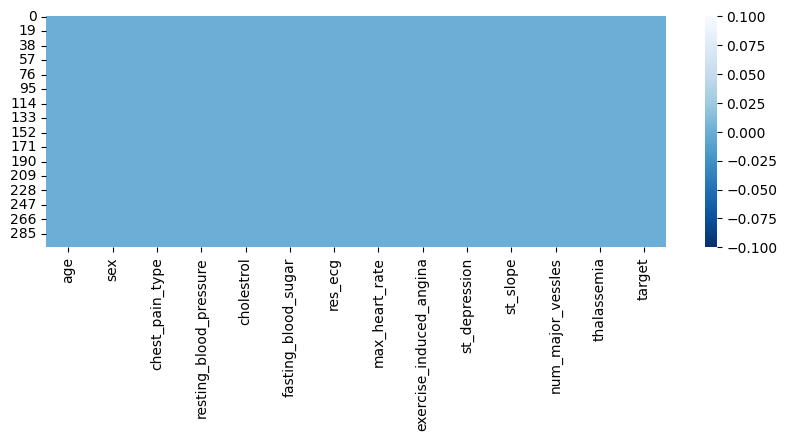

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Visualizing the missing data
plt.figure(figsize=(10, 3))
sns.heatmap(df.isnull(), cbar=True, cmap='Blues_r')


# Exploratory Data Analysis

## Univariate Analysis

In [ ]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'res_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessles', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

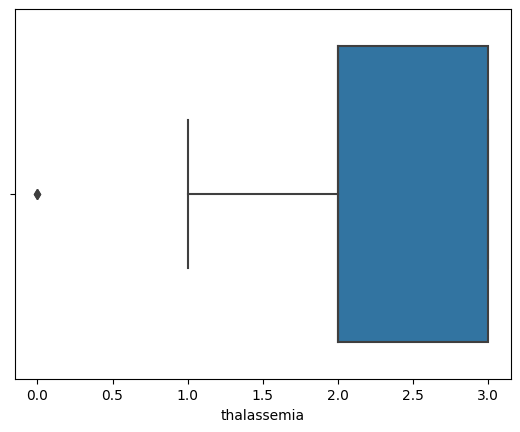

In [ ]:
# Check for outliers
sns.boxplot(x=df["thalassemia"])

#### Narration:
The diagram depicted above illustrates that the third quartile for thalassemia is 3.0, while the first quartile is 2.0. There is an extreme value at the beginning point of 0.0, which is an outlier.

<Axes: xlabel='cholestrol'>

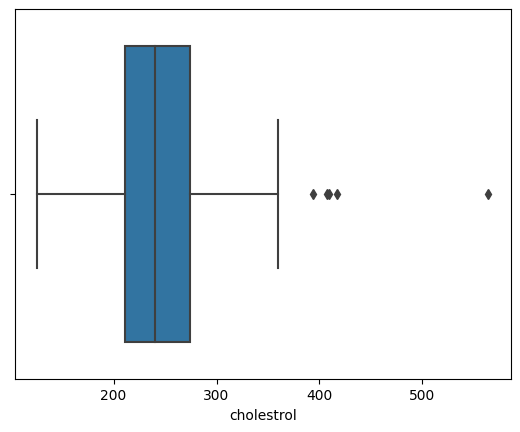

In [ ]:
# Check for outliers
sns.boxplot(x=df["cholestrol"])

#### Narration

* On this graph or image, there are four data points that are considered outliers, which are located at 400 and 500. 
* The 75th percentile is situated at the 280 mark, while the 25th percentile is positioned below 210. 
* The midpoint, or median, of the data is 250, and the highest value is 370, whereas the lowest value is at 40.


<Axes: xlabel='resting_blood_pressure'>

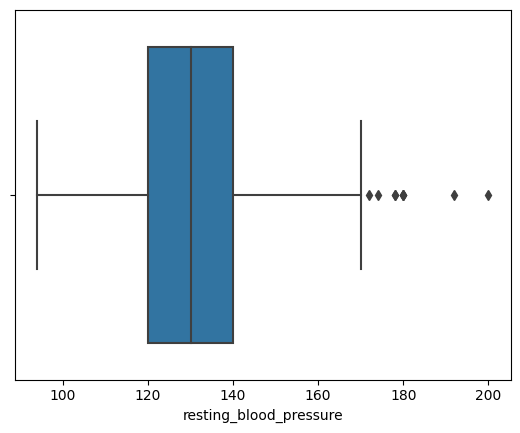

In [ ]:
# Check for outliers
sns.boxplot(x=df["resting_blood_pressure"])

#### Narration
*This chart or image displays six data points that are outliers, positioned at 170, 172, 178, 180, 195, and 200. 
* The 75th percentile of the data is at 140, while the 25th percentile is below 120.
* The median point of the data, which is the midpoint, is 130. 
*The highest value in the dataset is 170, and the lowest value is located at 40.

<Axes: xlabel='max_heart_rate'>

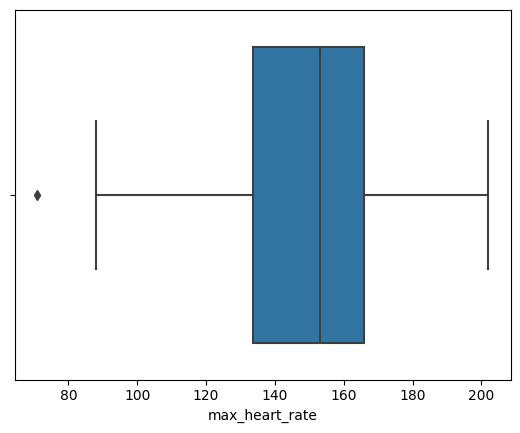

In [ ]:
# Check for outliers
sns.boxplot(x=df["max_heart_rate"])

####  Narration
* This graph or picture shows a single data point that is an outlier, located at 30. 
* The 75th percentile of the data is situated at 170, while the 25th percentile is less than 135. The midpoint of the data, also known as the median, is 155. 
* The greatest value in the dataset is 200, and the smallest value is at 85.

Text(0.5, 1.0, 'Total Number of Patients')

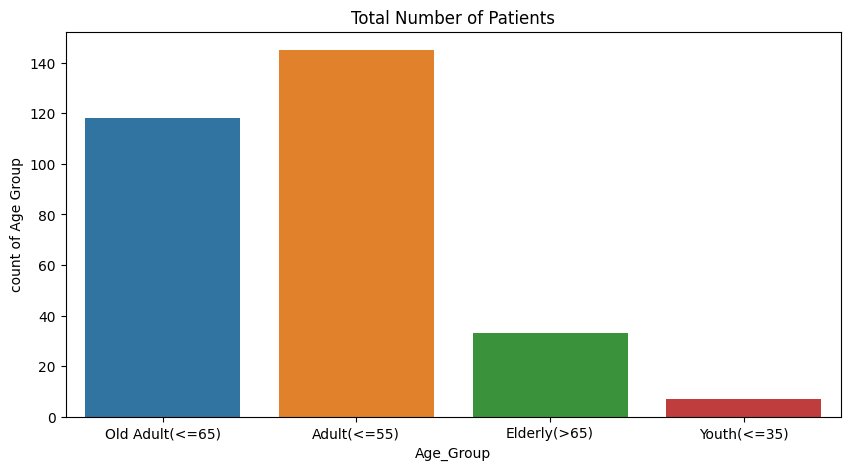

In [ ]:
# Data visualization
# Age_bracket
def age_bracket(age):
  if age <= 35:
     return "Youth(<=35)"
  elif age <= 55:
      return "Adult(<=55)"
  elif age <= 65:
      return "Old Adult(<=65)"
  else:
      return "Elderly(>65)"
df['age_bracket'] = df['age'].apply(age_bracket)

# Investigating the age group of patients
plt.figure(figsize = (10,5))
sns.countplot(x= 'age_bracket', data=df)
plt.xlabel('Age_Group')
plt.ylabel('count of Age Group')
plt.title('Total Number of Patients')


#### Narration:
According to the Age_Group chart, Adult patients aged 55 or below had a total of 140 patients, which is greater than any other age group. The Old Adult group (aged 65 or below) had a patient count of 118, while the Elderly and Youth groups had the lowest patient counts, with a combined total of 10.

Text(0.5, 1.0, 'Total Number of Patients')

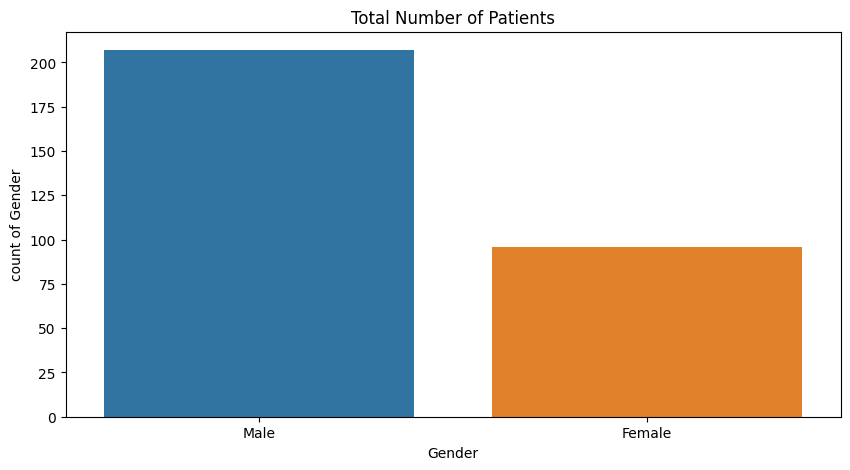

In [ ]:
# Data visualization
# Sex
def gender(sex):
  if sex == 1:
    return "Male"
  else:
      return "Female"
  
df['gender'] = df['sex'].apply(gender)

# Investigating the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x= 'gender', data=df)
plt.xlabel('Gender')
plt.ylabel('count of Gender')
plt.title('Total Number of Patients')


#### Narration:
Out of the patients who were screened, there were 200 males and 100 females. This indicates that the number of male patients is double that of the females.

Text(0.5, 1.0, 'Total number of Patients')

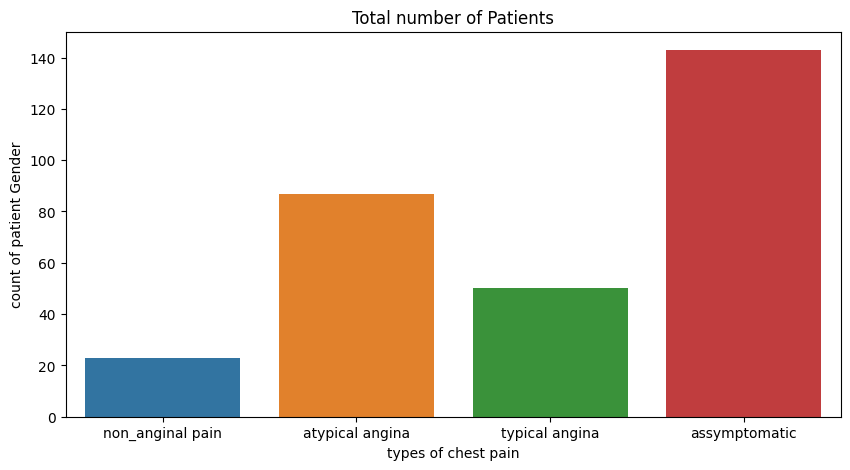

In [ ]:
# Data visualization
# chest_pain_type (1: typical angina, 2: atypical angina, 3: non-angina pain, 4: asymptomatic)
def chest_pain(cp):
  if cp == 1:
     return "typical angina"
  elif cp == 2:
      return "atypical angina"
  elif cp == 3:
      return "non_anginal pain"
  else:
      return "assymptomatic"

df['cp_cat'] = df['chest_pain_type'].apply(chest_pain)

# Investigating the gender of patients
plt.figure(figsize = (10,5))
sns.countplot(x= 'cp_cat', data=df)
plt.xlabel('types of chest pain')
plt.ylabel('count of patient Gender')
plt.title('Total number of Patients')


#### Narration:
As mentioned earlier, there were 140 patients who exhibited asymptomatic chest pain, followed by atypical angina with a total of 90 patients, typical angina with 40 patients, and non-anginal pain with the lowest total of 24 patients.

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,res_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessles,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non_anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,assymptomatic


yes    165
no     138
Name: label, dtype: int64


Text(0.5, 1.0, 'Total Number of Patients')

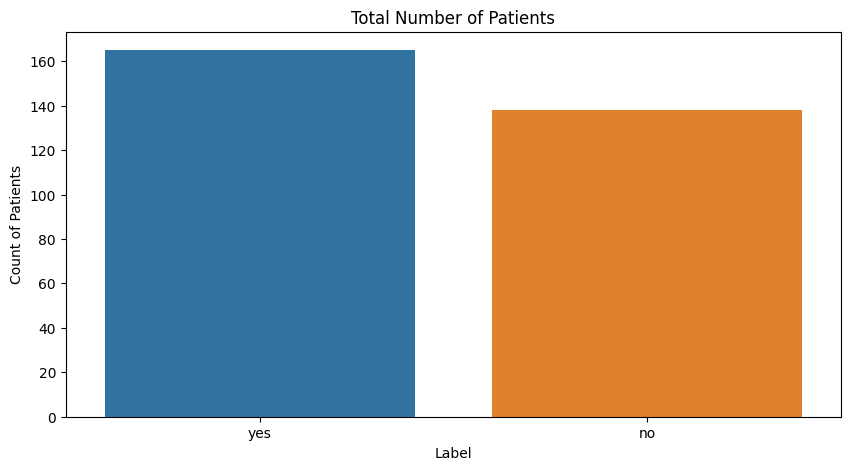

In [ ]:
# Data visualization
# target - have disease or  ot (1=yes, 0=no)
def label(tg):
    if tg == 1:
        return "yes"
    else:
        return "no"

df['label'] = df['target'].apply(label)

# Total patients in each category
print(df["label"].value_counts())

# Investigating the gender of patients
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=df)
plt.xlabel('Label')
plt.ylabel('Count of Patients')
plt.title('Total Number of Patients')



#### Narration:
Out of the total number of patients, 160 responded with a "yes" while 140 responded with a "no" to the label.

# Bivariate Analysis



Text(0.5, 1.0, 'Total Number of Patients')

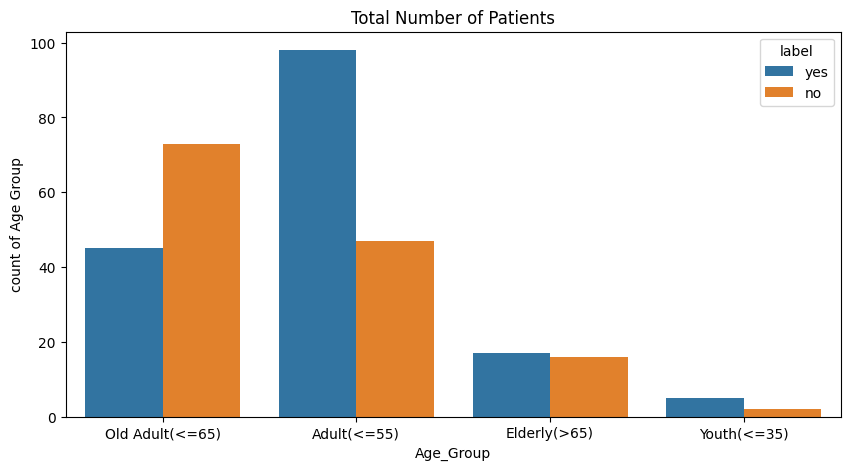

In [ ]:
# Investigating the age group of patients by the target feature
plt.figure(figsize = (10,5))
sns.countplot(x= 'age_bracket', data=df, hue='label')
plt.xlabel('Age_Group')
plt.ylabel('count of Age Group')
plt.title('Total Number of Patients')

#### Narration:
The adult age group had the most affirmative responses with a count of 96 in the story being told, while the elderly group had the highest negative responses with 78 'no's. The youth group had the smallest number of positive responses with only 7 'yes's and 2 'no's.

Text(0.5, 1.0, 'Total Number of Patients')

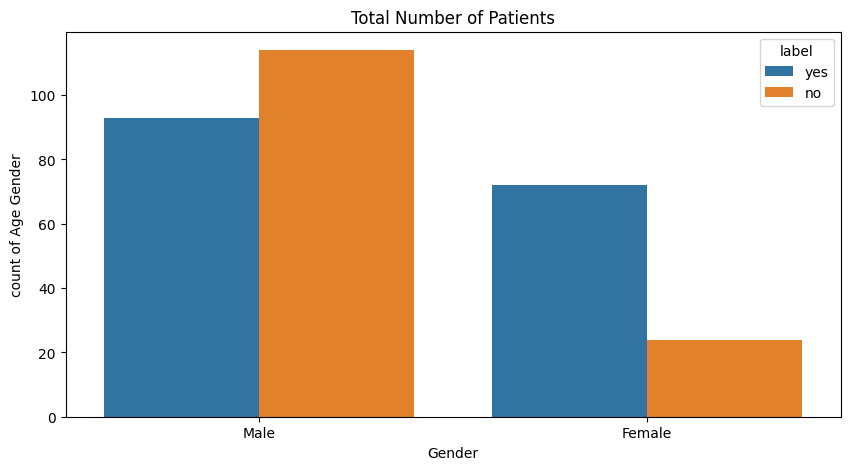

In [ ]:
# Investigating the gender of patients bythe target feature
plt.figure(figsize = (10,5))
sns.countplot(x= 'gender', data=df, hue='label')
plt.xlabel('Gender')
plt.ylabel('count of Age Gender')
plt.title('Total Number of Patients')

#### Narration:
According to the investigation, the largest number of negative responses by gender came from males, with over 100 indicating 'no' while 90 responded with 'yes'.

Text(0.5, 1.0, 'Total Number of Patients')

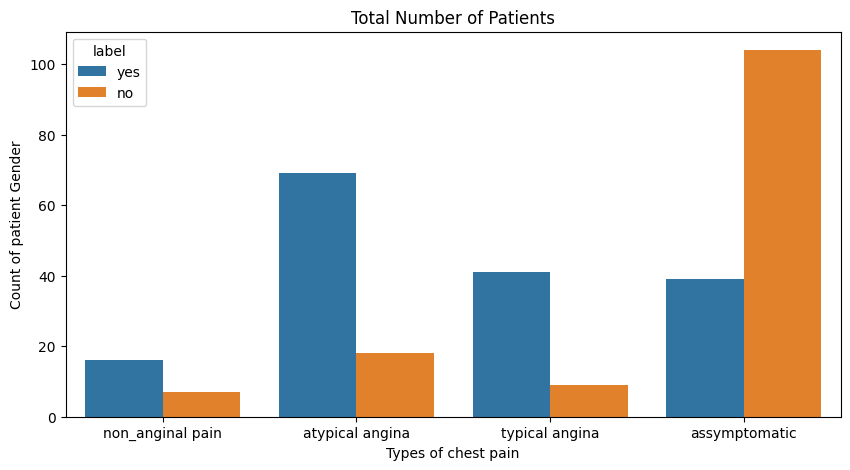

In [ ]:
# Investigating the chest pain type of patients bythe target feature
plt.figure(figsize = (10,5))
sns.countplot(x= 'cp_cat', data=df, hue='label')
plt.xlabel('Types of chest pain')
plt.ylabel('Count of patient Gender')
plt.title('Total Number of Patients')

#### Narration:
Out of a total of 70 patients who experienced chest pain symptoms, the atypical angina pain type was reported by all of them. On the other hand, none of the 100 patients with asymptomatic pain type reported experiencing chest pain symptoms. In contrast, there were very few instances of patients with non-angina pain type reporting either 'yes' or 'no' to chest pain symptoms.

# Multivariate Analysis

#### Exploratory Data Analysis - Multivariate Analysis

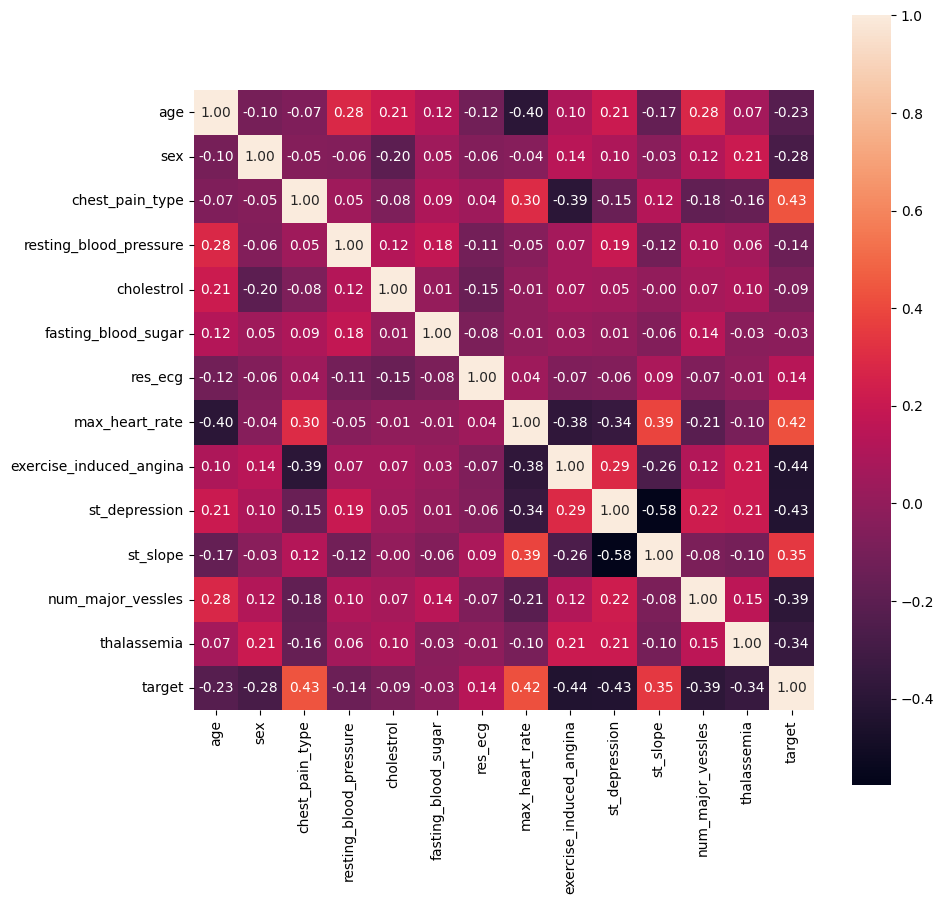

In [ ]:
# Correlation between SalePrice and other variables in the dataset
plt.figure(figsize=(10, 10))

hm = sns.heatmap(df.corr(), cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10})


#### Narration:
The data in the table indicates that there are various correlations between the variables. Age has a weak negative correlation of -0.23, whereas sex has a slightly weaker correlation than age at -0.28. Chest pain type has a weak positive correlation at 0.43. Resting blood pressure has a weak negative correlation of -0.14, while cholesterol has a very weak negative correlation at -0.09. Thalassemia has a weak negative correlation of -0.34, while fasting blood sugar has a very negative correlation. The res_ecg variable has a positive correlation of 0.14, whereas exercise-induced angina has a weak negative correlation of -0.4. ST depression has a negative correlation of -0.44, and st_slope has a positive correlation of 0.35. The num_major_vessels variable has a negative correlation of -0.39, and finally, the target variable has a perfect correlation.

## Feature Engineering/ Data pre-processing

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,res_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessles,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non_anginal pain,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,assymptomatic,yes


In [ ]:
# Create a copy of the data (Exclude target/label alongside other columns that was created)
# Selecting the columns of interest and assigning to a new DataFrame
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'res_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessles', 'thalassemia', 'target']]


# Selecting only the 'target' column and assigning to a new DataFrame
label = df[['target']]

In [ ]:
df1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholestrol                   int64
fasting_blood_sugar          int64
res_ecg                      int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessles            int64
thalassemia                  int64
target                       int64
dtype: object

In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestrol,fasting_blood_sugar,res_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessles,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non_anginal pain,yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,assymptomatic,yes


In [ ]:
df1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'res_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessles', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
# Dealing with outliers - 'resting_blood_pressure', 'cholesterol', 'thalassemia'

# Normalize the data
scaler = MinMaxScaler()

df1["Scaled_RBP"] = scaler.fit_transform(df1['resting_blood_pressure'].values.reshape(-1,1))
df1["Scaled_chol"] = scaler.fit_transform(df1[['cholestrol']].values.reshape(-1,1))
df1["Scaled_thal"] = scaler.fit_transform(df1[['thalassemia']].values.reshape(-1,1))
df1["Scaled_max_heart_rate"] = scaler.fit_transform(df1[['max_heart_rate']].values.reshape(-1,1))

df1.drop(['resting_blood_pressure', 'thalassemia', 'cholestrol', 'max_heart_rate'], axis=1, inplace=True)

df1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,res_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessles,target,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,1,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,1,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,1,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,1,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,1,0.245283,0.520548,0.666667,0.702290


## Machine Learning

In [ ]:
df1 = df[['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'res_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessles', 'thalassemia', 'target']]


# Selecting only the 'target' column and assigning to a new DataFrame
label = df[['target']]

In [ ]:
df1.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholestrol',
       'fasting_blood_sugar', 'res_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessles', 'thalassemia', 'target'],
      dtype='object')

In [ ]:
# Split the dataset into training and testing sets - X = Questions, y = Answers

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df1, label, test_size=0.2, random_state=42)


In [ ]:
# Model Building

# Logistics Regression

logreg = LogisticRegression()

logreg.fit(x_train, y_train)

ly_pred = logreg.predict(x_test)

print("Logistic Rgeression")
print("Accuracy:", accuracy_score(y_test, ly_pred))
print("Precision:", precision_score(y_test, ly_pred))
print("Recall:", recall_score(y_test, ly_pred))
print("F1_score:", f1_score(y_test, ly_pred))
print("AUC-ROC:", roc_auc_score(y_test, ly_pred))

Logistic Rgeression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0
AUC-ROC: 1.0


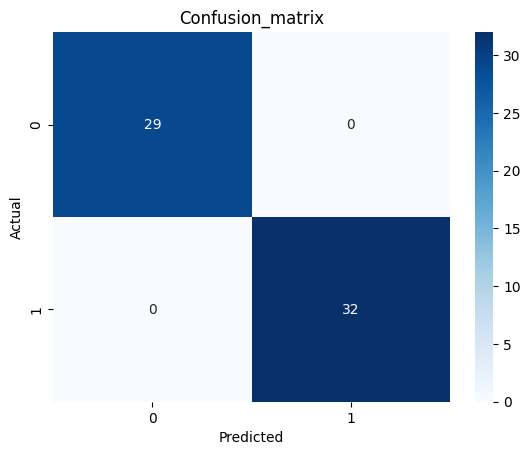

In [ ]:
# Create a confusion matrix
lcm = confusion_matrix(y_test, ly_pred)

# Visualize the confuison matrix
sns.heatmap(lcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion_matrix")
plt.show()

#### Narration:
The presented graph displays that the observed value for the logistics confusion matrix is 29, while the anticipated value is 32. This indicates that the expected metric in the confusion matrix reflects a rise in the number of recorded cases of heart diseases.

In [ ]:
# Model Building
# Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfy_pred = rfc.predict(x_test)
print("Logistic Rgeression")
print("Accuracy:", accuracy_score(y_test, rfy_pred))
print("Precision:", precision_score(y_test, rfy_pred))
print("Recall:", recall_score(y_test, rfy_pred))
print("F1_score:", f1_score(y_test, rfy_pred))
print("AUC-ROC:", roc_auc_score(y_test, rfy_pred))

Logistic Rgeression
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0
AUC-ROC: 1.0


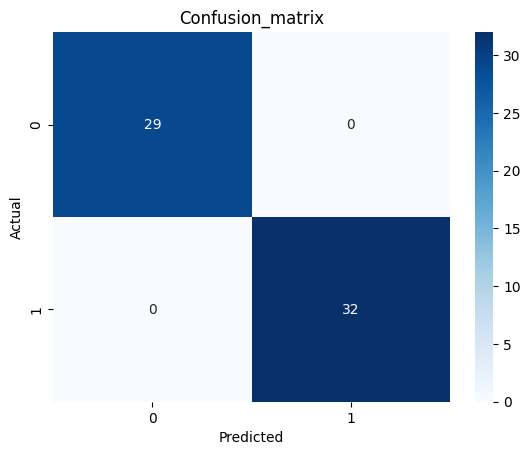

In [ ]:
# Create a confusion matrix
rcm = confusion_matrix(y_test, rfy_pred)

# Visualize the confuison matrix
sns.heatmap(rcm, annot=True, cmap="Blues", fmt="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion_matrix")
plt.show()

#### Narration: 
According to the preceding prediction, the random confusion matrix indicates that there were 29 actual cases and 32 predicted cases. This suggests that there has been an escalation in the number of cases.

In [ ]:
from xgboost.sklearn import XGBRFClassifier
# 8 Machine Learning Algorithms will be applied to the dataset

classifiers = [    [XGBRFClassifier(), 'XGBRF Classifier'],
    [RandomForestClassifier(), 'Random Forest'],
    [KNeighborsClassifier(), 'K-Nearest Neighbors'],
    [SGDClassifier(), 'SGD Classifier'],
    [SVC(), 'SVC'],
    [GaussianNB(), "Naive Bayes"],
    [DecisionTreeClassifier(random_state=42), "Decision Trees"],
    [LogisticRegression(), 'Logistic Regression']
]


In [ ]:
acc_list = {}
precision_list = {}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(x_train, y_train)
    model_name = classifier[1]

    pred = model.predict(x_test)

    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)

    acc_list[model_name] = [str(round(a_score*100, 2)) + '%']
    precision_list[model_name] = [str(round(p_score*100, 2)) + '%']
    recall_list[model_name] = [str(round(r_score*100, 2)) + '%']
    roc_list[model_name] = [str(round(roc_score*100, 2)) + '%']

    if model_name != classifiers[0][1]:
        print('')


In [ ]:
print("Accuracy Score")
s1 = pd.DataFrame(acc_list)
s1.head()

Accuracy Score


,XGBRF Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Trees,Logistic Regression
0,100.0%,100.0%,70.49%,49.18%,70.49%,100.0%,100.0%,100.0%


In [ ]:
print("Precision")
s2 = pd.DataFrame(precision_list)
s2.head()

Precision


,XGBRF Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Trees,Logistic Regression
0,100.0%,100.0%,70.59%,100.0%,66.67%,100.0%,100.0%,100.0%


In [ ]:
print("Recall")
s3 = pd.DataFrame(recall_list)
s3.head()

Recall


,XGBRF Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Trees,Logistic Regression
0,100.0%,100.0%,75.0%,3.12%,87.5%,100.0%,100.0%,100.0%


In [ ]:
print("ROC Score")
s4 = pd.DataFrame(roc_list)
s4.head()

ROC Score


,XGBRF Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Trees,Logistic Regression
0,100.0%,100.0%,70.26%,51.56%,69.61%,100.0%,100.0%,100.0%


#### In colclusion:
The data's accuracy score indicates that the SGD classifier did not perform well, unlike the Random Forest, Classifier, Naive Bayes, Decision Trees, and Logistic Regression models, which all scored 100%. However, the SGD classifier had the best precision score at 100%. In S3, the SGD classifier had a poor performance score of 3.12%, while K-Nearest Neighbors performed the best with a score of 75.0%. In S2, the model had the best overall performance, but both precision and recall scores were poor. Therefore, it seems like te most potent to adopt for training, testing and evalauting our model.